In [1]:
#Proposal

In [2]:
library(tidyverse)
library(tidymodels)
library(repr)
options(repr.matrix.max.rows = 6)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_co

In [3]:
# read data here

cleveland_data <- read.table("data/heart_disease/processed.cleveland.data", sep=",")
colnames(cleveland_data) <- c('age','sex','cp','trestbps','chol','fbs', 'restcg', 'thalach',
                              'exang','oldpeak','slope','ca','thal','num')
# cleveland_data

# clean and wrangle the data
cleveland_clean <- cleveland_data |> mutate(age = as.numeric(age), sex = as_factor(sex), cp = as_factor(cp), trestbps = as.numeric(trestbps), 
                                            chol = as.numeric(chol), fbs = as_factor(fbs), restcg = as_factor(restcg),
                                            thalach = as.numeric(thalach), exang = as_factor(exang), oldpeak = as.numeric(oldpeak),
                                            slope = as.numeric(slope), ca = as.numeric(ca), thal = as_factor(thal),
                                            num = as.factor(num)) |>
                                     mutate(sex = fct_recode(sex, "male" = "1", "female" = "0"),
                                            cp = fct_recode(cp, "typical angina" = "1", "atypical angina" = "2",
                                                            "non-anginal pain" = "3", "asymptomatic" = "4"),
                                           num = fct_recode(num, "No heart disease" = "0", "Has heart disease" = "1",
                                                           "Has heart disease" = "2", "Has heart disease" = "3",
                                                           "Has heart disease" = "4"))

cleveland_clean
                             
# Using the values of trestbps + thalach to predict/classify the cp of an unknown patient.

Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `ca = as.numeric(ca)`.
Caused by warning:
! NAs introduced by coercion”


age,sex,cp,trestbps,chol,fbs,restcg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
63,male,typical angina,145,233,1,2,150,0,2.3,3,0,6.0,No heart disease
67,male,asymptomatic,160,286,0,2,108,1,1.5,2,3,3.0,Has heart disease
67,male,asymptomatic,120,229,0,2,129,1,2.6,2,2,7.0,Has heart disease
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,male,asymptomatic,130,131,0,0,115,1,1.2,2,1,7.0,Has heart disease
57,female,atypical angina,130,236,0,2,174,0,0.0,2,1,3.0,Has heart disease
38,male,non-anginal pain,138,175,0,0,173,0,0.0,1,NA,3.0,No heart disease


In [4]:
set.seed(20)
#select columns:trestbps, thalach, cp
cleveland_select <- cleveland_clean |> select(trestbps, thalach, num)

#split the dataset into training set and testing set

cleveland_split <- initial_split(cleveland_select, prop = 0.75, strata = num)
cleveland_train <- training(cleveland_split)
cleveland_test <- testing(cleveland_split)

cleveland_train

trestbps,thalach,num
<dbl>,<dbl>,<fct>
160,108,Has heart disease
120,129,Has heart disease
140,155,Has heart disease
⋮,⋮,⋮
132,166,No heart disease
120,182,No heart disease
138,173,No heart disease


In [5]:
cleveland_clean

age,sex,cp,trestbps,chol,fbs,restcg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
63,male,typical angina,145,233,1,2,150,0,2.3,3,0,6.0,No heart disease
67,male,asymptomatic,160,286,0,2,108,1,1.5,2,3,3.0,Has heart disease
67,male,asymptomatic,120,229,0,2,129,1,2.6,2,2,7.0,Has heart disease
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,male,asymptomatic,130,131,0,0,115,1,1.2,2,1,7.0,Has heart disease
57,female,atypical angina,130,236,0,2,174,0,0.0,2,1,3.0,Has heart disease
38,male,non-anginal pain,138,175,0,0,173,0,0.0,1,NA,3.0,No heart disease


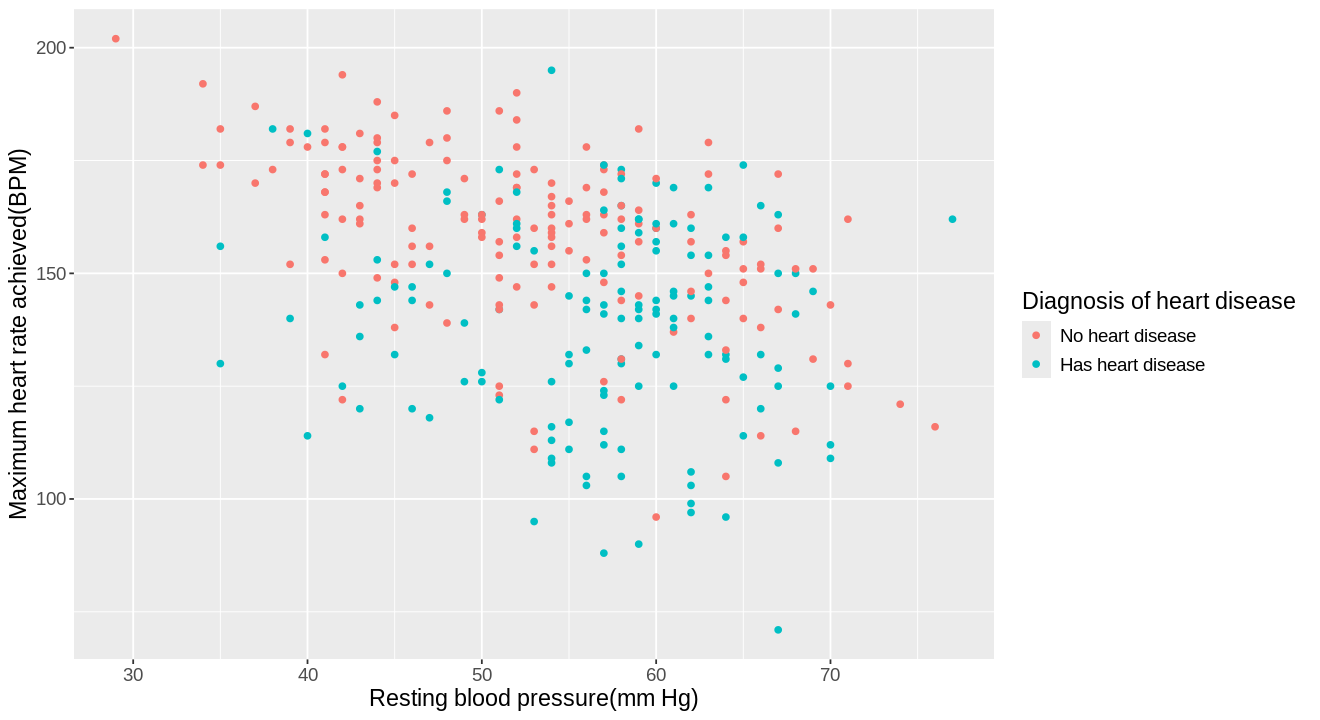

In [6]:
#The unscaled plot with training data here
options(repr.plot.width = 11, repr.plot.height = 6)


cleveland_train_plot <- cleveland_clean |>
                        ggplot(aes(x = age, y = thalach, color = num)) +
                        geom_point() + 
                        labs(x = "Resting blood pressure(mm Hg)",y = "Maximum heart rate achieved(BPM)", 
                             colour = "Diagnosis of heart disease") +
                        scale_fill_brewer(palette = 'YlGnBu') +
                        theme(text = element_text(size = 14))

cleveland_train_plot